## Importing Libraries

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import norm

## Loading Dataset

In [248]:
# Here we read our dataset into 'df' variable
df = pd.read_csv("Customers.csv")

# Displaying our datset
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [249]:
# Displaying first 5 data entries

df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [250]:
# Displaying info of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


**The column 'Profession' only has 1965 non-null values indicating that there are potentially atleast 35 NaN values.**

In [251]:
# Describing our dataset

df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


## Finding Null Values

In [252]:
# Here we are not just finding the NaN values but also counting them

df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

**Only the column 'Profession' has 35 NaN values, rest columns don't have any kind of missing values.**

In [253]:
# Finding the sum of individual null values from the column 'Profession'

df["Profession"].isnull().sum()

35

## Filling Null Values

**Using the 'FFILL' (Forward Fill) Method.**

In [254]:
# Here the missing values will be filled using forward method
df["Profession"].fillna(method="ffill",inplace=True)

# Checking the final sum of individual null values from the column 'Profession'
df["Profession"].isnull().sum()

0

**The result '0' indicates that we've successfully treated all the null values from the column 'Profession'.**

## Normalization using Min Scaler

In [255]:
# Using the normalizer function on a column with int or float values only
# We cannot use Normalization on column with str values

test_df = df['Annual Income ($)']
test_df

0        15000
1        35000
2        86000
3        59000
4        38000
         ...  
1995    184387
1996     73158
1997     90961
1998    182109
1999    110610
Name: Annual Income ($), Length: 2000, dtype: int64

### Note:
**We can also use the MinMaxScaler Library Function to perform Normalization on whole dataset.**

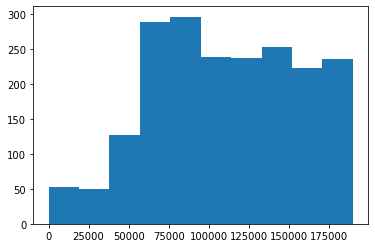

In [256]:
# PLOT-1
# Visualizing the Default distribution of data

plt.hist(test_df)
plt.show()

**Before using the Normalization the variation between data lies from 0 to 1,75,000 (X-Axis) which is too much to interpret.**

In [257]:
# Using the mean scaler
# AKA Applying Normalization

normalized_df=(test_df-test_df.mean())/test_df.std()
print(normalized_df)

0      -2.092978
1      -1.655719
2      -0.540710
3      -1.131009
4      -1.590130
          ...   
1995    1.610318
1996   -0.821474
1997   -0.432248
1998    1.560514
1999   -0.002663
Name: Annual Income ($), Length: 2000, dtype: float64


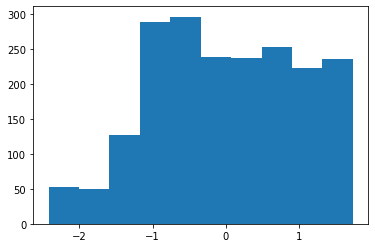

In [258]:
# PLOT-2
# Visualizing the distribution of data after Normalization

plt.hist(normalized_df)
plt.show()

**After using the Normalization the same data now lies between -3 to 2 (X-Axis) which can be easily interpreted.**

In [259]:
# Updating our old dataset with new normalized values

df.update(normalized_df)

## Z-Score

In [260]:
# Using the Z-score on the same column ('Annual Income ($)')
# Here the result of Z-score is same as the Mean Scaler

stats.zscore(test_df)

array([-2.09350095, -1.65613312, -0.54084515, ..., -0.43235606,
        1.56090408, -0.00266404])

## Turning Categorical Feature into Numeric Type

In [261]:
# Here we use the straight forward method of replacing Male with '0' and Female with '0' for our dataset
# This is also know as One-Hot-Encoding, but here it was done without using OneHotEncoder

df['Gender'].replace(['Male','Female'],[0,1], inplace=True)

In [262]:
# Displaying the altered dataset
# Here the Gender is changed as Male:0 Female:1 and the column 'Annual Income ($)' has been Normalized

df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,-2.092978,39,Healthcare,1,4
1,2,0,21,-1.655719,81,Engineer,3,3
2,3,1,20,-0.540710,6,Engineer,1,1
3,4,1,23,-1.131009,77,Lawyer,0,2
4,5,1,31,-1.590130,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,1,71,1.610318,40,Artist,8,7
1996,1997,1,91,-0.821474,32,Doctor,7,7
1997,1998,0,87,-0.432248,14,Healthcare,9,2
1998,1999,0,77,1.560514,4,Executive,7,2
